In [4]:
import os
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import sklearn

C:\Users\ferna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Download latest version
path = kagglehub.dataset_download("argonalyst/sao-paulo-real-estate-sale-rent-april-2019")

file_path = os.path.join(path, "sao-paulo-properties-april-2019.csv")
df = pd.read_csv(file_path)
df.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

In [7]:
df_rent = df[df['Negotiation Type'] == 'rent']

In [8]:
custom_center = {
    'lat': df_rent['Latitude'].median(),
    'lon': df_rent['Longitude'].median()
}

custom_color = [
    (0.00, '#0000FF'),
    (0.02, '#0080FF'),
    (0.05, '#00FF80'),
    (0.10, '#00FF00'),
    (0.15, '#FF8000'),
    (1.00, '#FF0000')
]

fig = px.scatter_map(
    df_rent,
    lat='Latitude',
    lon='Longitude',
    color='Price',
    size='Size',
    size_max=15,
    zoom=10,
    opacity=0.4,
    map_style='light',
    center=custom_center,
    color_continuous_scale=custom_color,
    height=600,
    width=1000
)

fig.show()

In [9]:
df_rent.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000
mean,3077.669065,825.194798,89.486165,2.304234,2.105562,1.024488,1.452269,0.299806,0.172939,0.487963,0.000830,-22.032278,-43.500873
std,3522.830284,835.621937,63.976416,0.829108,0.998162,0.884241,0.889535,0.458205,0.378220,0.499890,0.028802,5.962534,11.675070
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.749039,-58.364352
25%,1350.000000,395.750000,52.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.598066,-46.689788
50%,2000.000000,595.000000,67.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.555869,-46.644793
75%,3300.000000,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.522756,-46.585110
max,50000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


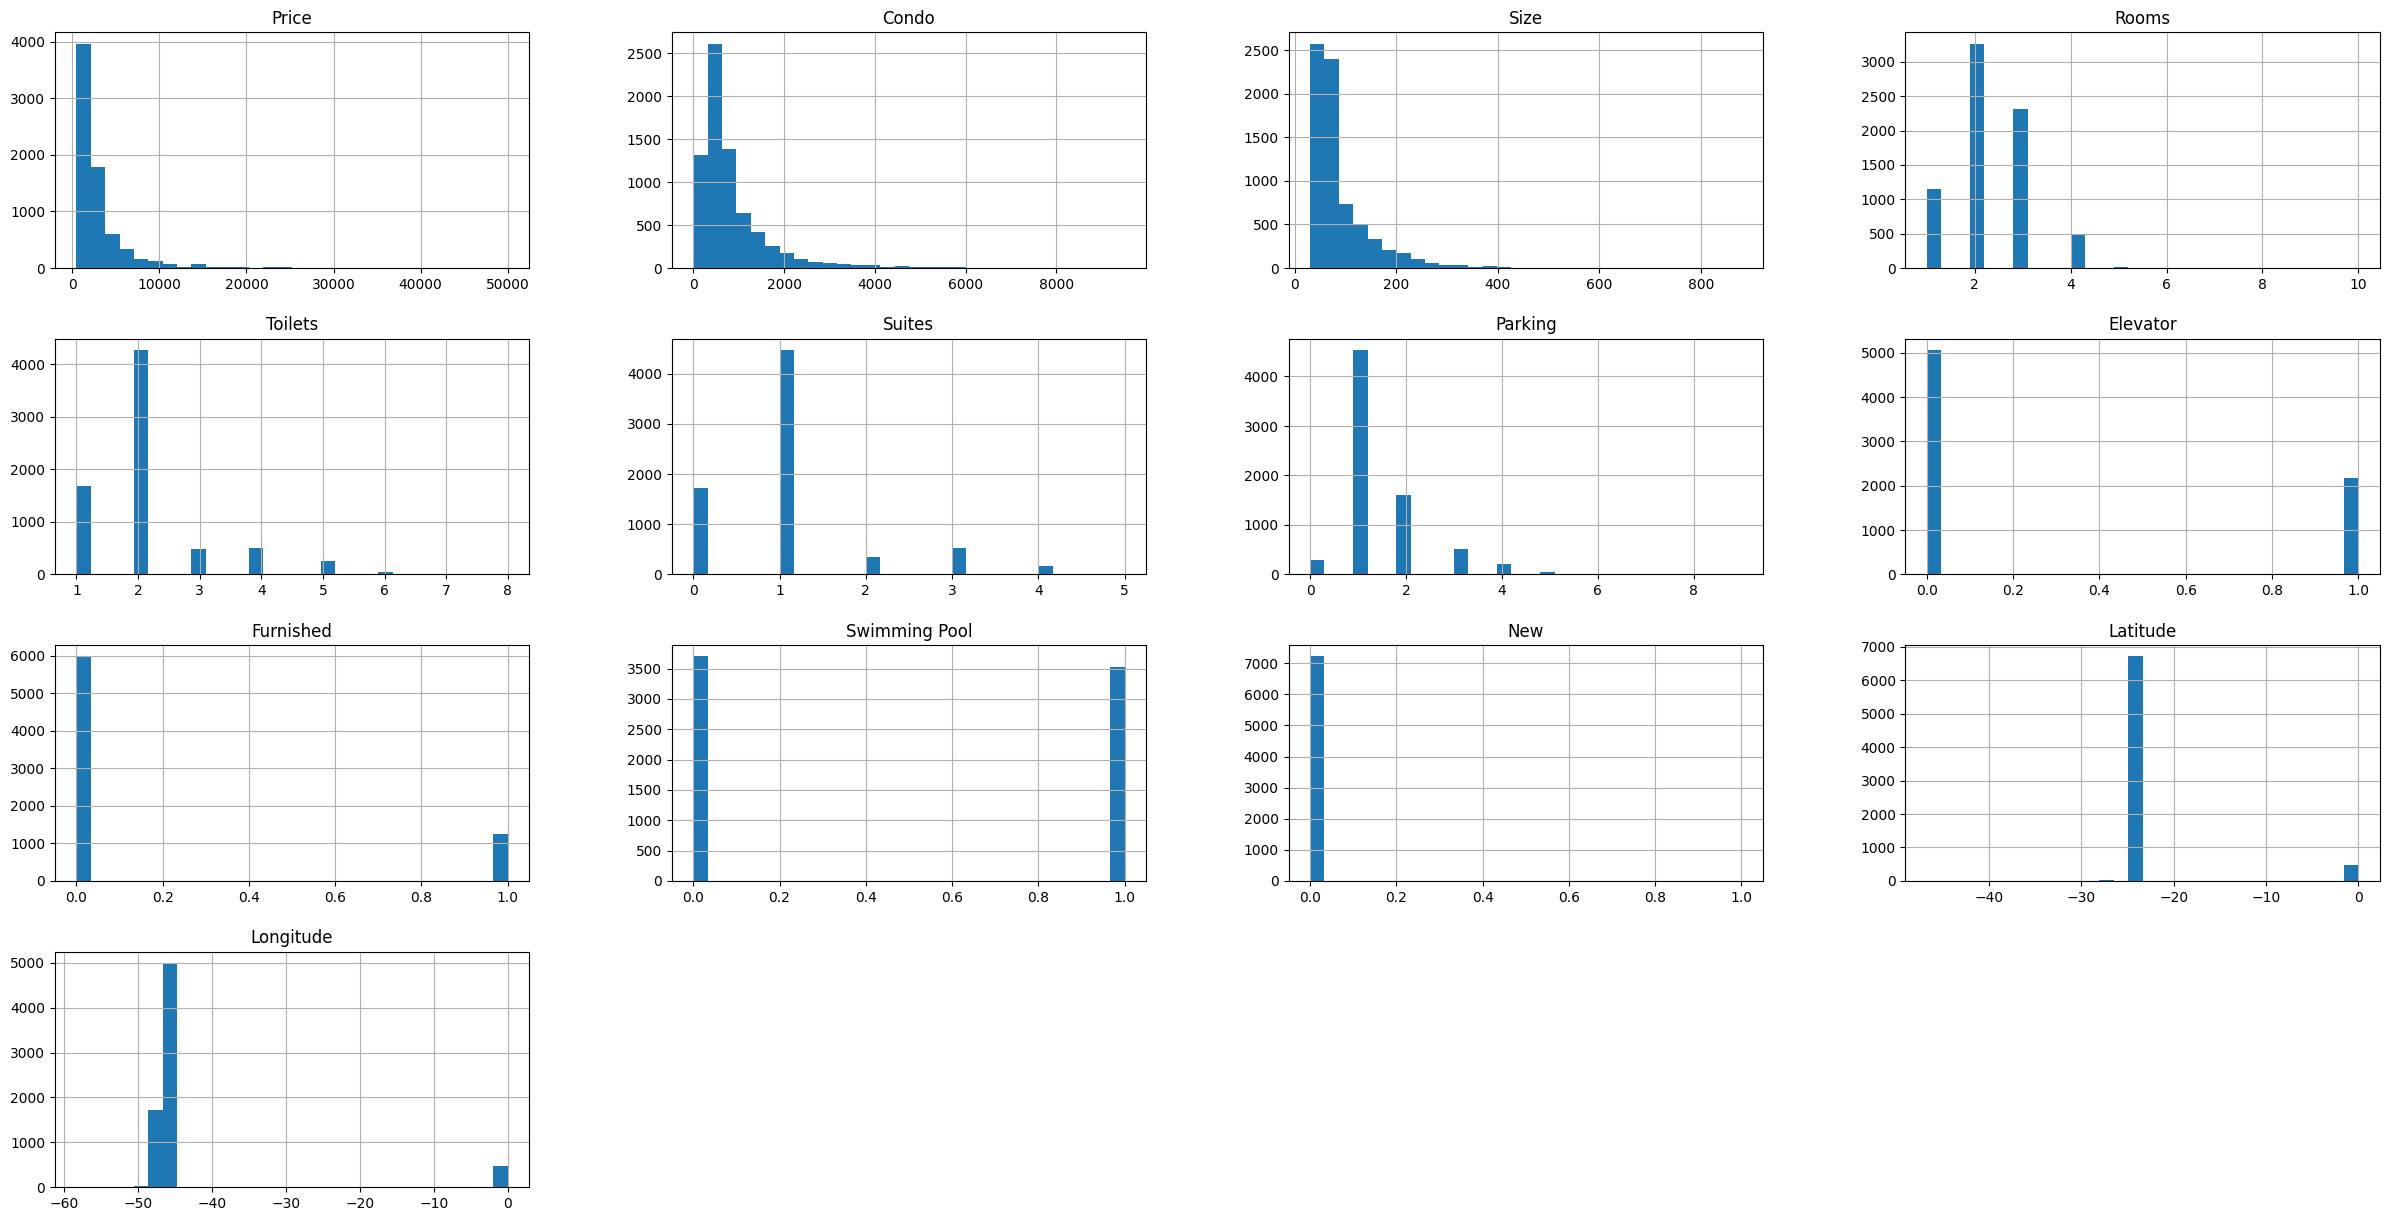

In [10]:
df_rent.hist(bins=30, figsize=(30,15));

In [11]:
df_rent["New"].value_counts()

New
0    7222
1       6
Name: count, dtype: int64

In [12]:
df_rent["Negotiation Type"].value_counts()

Negotiation Type
rent    7228
Name: count, dtype: int64

In [13]:
df_rent["District"].value_counts()

District
Mooca/São Paulo              178
Moema/São Paulo              163
Vila Mariana/São Paulo       161
Morumbi/São Paulo            159
Pinheiros/São Paulo          153
                            ... 
Lajeado/São Paulo              8
Guaianazes/São Paulo           6
Parque do Carmo/São Paulo      6
Jardim São Luis/São Paulo      3
Grajaú/São Paulo               2
Name: count, Length: 94, dtype: int64

In [14]:
df_rent.corr(numeric_only=True)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
Price,1.000000,0.700361,0.731795,0.390951,0.583488,0.588329,0.640743,0.031860,0.171859,0.206884,-0.008477,-0.036935,-0.038362
Condo,0.700361,1.000000,0.812374,0.494153,0.596520,0.597069,0.703888,0.020271,0.075928,0.198613,-0.011678,-0.045458,-0.048381
Size,0.731795,0.812374,1.000000,0.673232,0.694294,0.701954,0.752954,0.006993,0.005886,0.148408,-0.017416,-0.043168,-0.046238
Rooms,0.390951,0.494153,0.673232,1.000000,0.557247,0.545859,0.592387,0.000993,-0.104705,0.151225,-0.022166,-0.050753,-0.052897
Toilets,0.583488,0.596520,0.694294,0.557247,1.000000,0.920932,0.703447,0.143176,0.068190,0.262526,-0.007862,-0.128304,-0.129482
Suites,0.588329,0.597069,0.701954,0.545859,0.920932,1.000000,0.718788,0.106189,0.068014,0.267219,-0.006231,-0.130413,-0.131519
Parking,0.640743,0.703888,0.752954,0.592387,0.703447,0.718788,1.000000,0.027476,0.066077,0.304904,0.001547,-0.054828,-0.057929
Elevator,0.031860,0.020271,0.006993,0.000993,0.143176,0.106189,0.027476,1.000000,0.095207,0.150773,0.044049,-0.117160,-0.108175
Furnished,0.171859,0.075928,0.005886,-0.104705,0.068190,0.068014,0.066077,0.095207,1.000000,0.185192,0.012224,-0.022449,-0.018386
Swimming Pool,0.206884,0.198613,0.148408,0.151225,0.262526,0.267219,0.304904,0.150773,0.185192,1.000000,0.019915,-0.025033,-0.020293


In [15]:
df_cleaned = df_rent.drop(['New','Property Type','Negotiation Type'], axis=1) #só possuem 1 valor

In [16]:
#### Tratando categóricas

one_hot = pd.get_dummies(df_cleaned['District'])

df = df_cleaned.drop('District', axis= 1)
df = df.join(one_hot)
df.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,930,220,47,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1000,148,45,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1000,100,48,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1000,200,48,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1300,410,55,2,2,1,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False


### Modelo

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
Y = df['Price']
X = df.loc[:, df.columns != 'Price']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

### Testando 3 modelos 

#### LinearRegression

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
alguns_dados = x_train[:5]
algumas_labels = y_train[:5]

print(f"Predições:{lin_reg.predict(alguns_dados)}")
print(f"Labels:{algumas_labels.values}")
alguns_dados

Predições:[5683.93075011 3425.26535714 1335.40398647  590.56025969 2849.39431403]
Labels:[3900 3200 1600 1300 2300]


,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,Latitude,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
10952,983,139,3,2,1,1,0,0,0,0.000000,...,False,False,False,False,False,False,False,False,False,False
81,850,105,3,4,3,2,0,0,1,-23.561751,...,False,False,False,False,False,False,False,False,False,False
2178,395,60,1,1,0,0,0,0,0,-23.554766,...,False,False,False,False,False,False,False,False,False,False
3273,580,44,2,1,0,1,0,0,0,-23.579361,...,False,False,False,False,False,False,False,True,False,False
1503,680,68,2,2,1,1,0,0,1,-23.584684,...,False,False,False,False,True,False,False,False,False,False


In [22]:
from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train, preds)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

1889.212821088103

In [23]:
preds = lin_reg.predict(x_test)
lin_mse = mean_squared_error(y_test, preds)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

2081.143337866607

#### DecisionTree Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [25]:
preds = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, preds)

tree_rmse = np.sqrt(tree_mse)
tree_rmse

37.84232758782527

In [26]:
preds = tree_reg.predict(x_test)
tree_mse = mean_squared_error(y_test, preds)

tree_rmse = np.sqrt(tree_mse)
tree_rmse

2678.0991291245655

### Cross Validation

In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("DP: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [1922.89963125 2283.35394522 2002.71587318 2025.10957055 2582.59579157
 2887.01820305 2388.04615093 1897.24084482 2361.34915889 2845.74321788]
Mean:  2319.6072387330064
DP:  346.20761610065966


Exemplo clássico de Overfitting

In [30]:
scores = cross_val_score(lin_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)


def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("DP: ", scores.std())

display_scores(lin_rmse_scores)

Scores:  [1843.09945917 1911.00833803 1888.97335933 1807.1872372  2436.32894501
 2165.14774703 1647.27398336 1676.48617019 1838.00882786 1958.68967775]
Mean:  1917.2203744917656
DP:  220.9519310000785


Exemplo de Underfitting

### Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
preds = rf_reg.predict(x_train)
rf_mse = mean_squared_error(y_train, preds)

rf_rmse = np.sqrt(rf_mse)
rf_rmse

662.2862016893768

In [32]:
scores = cross_val_score(rf_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)


def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("DP: ", scores.std())

display_scores(rf_rmse_scores)

Scores:  [1730.56831435 1747.22422964 1768.64630005 1868.92804586 2068.37014464
 2169.58615534 1622.8692321  1371.41731981 1618.92918487 1825.2863266 ]
Mean:  1779.1825253247716
DP:  215.89521075024615


### Avaliar e otimizar o modelo

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features':[2 , 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features':[2, 3, 4]}
]

grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

In [40]:
grid_search.fit(x_train, y_train)

,estimator,RandomForestRegressor()
,param_grid,"[{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}, {'bootstrap': [False], 'max_features': [2, 3, ...], 'n_estimators': [3, 10]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,30


In [41]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [44]:
final_model = grid_search.best_estimator_
final_model_pred = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_model_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

1793.0075767869469

In [46]:
fig = go.Figure(data=[go.Scatter(y=y_test.values),
                      go.Scatter(y=final_model_pred)])

fig.show()